#https://www.youtube.com/watch?v=CbTU92pbDKw

In [2]:
import pandas as pd
df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-14,243.860001,245.740005,241.509995,244.490005,242.149338,28651500
1,2022-06-15,248.309998,255.300003,246.419998,251.759995,249.349731,33111700
2,2022-06-16,245.979996,247.419998,243.020004,244.970001,242.624725,33169200
3,2022-06-17,244.699997,250.500000,244.029999,247.649994,245.279068,43084800
4,2022-06-21,250.259995,254.750000,249.509995,253.740005,251.310791,29928300
...,...,...,...,...,...,...,...
247,2023-06-08,323.940002,326.640015,323.350006,325.260010,325.260010,23277700
248,2023-06-09,324.989990,329.989990,324.410004,326.790009,326.790009,22514900
249,2023-06-12,328.579987,332.100006,325.160004,331.850006,331.850006,24260300
250,2023-06-13,334.470001,336.980011,330.390015,334.290009,334.290009,22951300


In [3]:
df = df[['Date','Close']]
df

,Date,Close
0,2022-06-14,244.490005
1,2022-06-15,251.759995
2,2022-06-16,244.970001
3,2022-06-17,247.649994
4,2022-06-21,253.740005
...,...,...
247,2023-06-08,325.260010
248,2023-06-09,326.790009
249,2023-06-12,331.850006
250,2023-06-13,334.290009


In [4]:
import datetime

In [8]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_obj = str_to_datetime('2022-06-14')
datetime_obj

datetime.datetime(2022, 6, 14, 0, 0)

In [9]:
df['Date'] = df['Date'].apply(str_to_datetime)

<ipython-input-9-82fc7f804c29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


In [10]:
df['Date']

0     2022-06-14
1     2022-06-15
2     2022-06-16
3     2022-06-17
4     2022-06-21
         ...    
247   2023-06-08
248   2023-06-09
249   2023-06-12
250   2023-06-13
251   2023-06-14
Name: Date, Length: 252, dtype: datetime64[ns]

In [12]:
df.index = df.pop('Date')
df

,Close
Date,
2022-06-14,244.490005
2022-06-15,251.759995
2022-06-16,244.970001
2022-06-17,247.649994
2022-06-21,253.740005
...,...
2023-06-08,325.260010
2023-06-09,326.790009
2023-06-12,331.850006


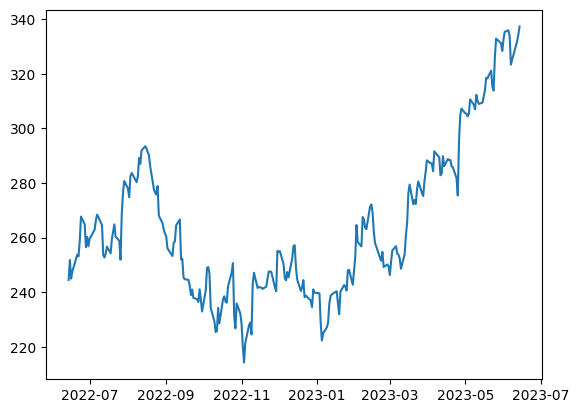

In [14]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [23]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2022-06-17'
windowed_df = df_to_windowed_df(df,
                                '2022-06-17',
                                '2023-06-14',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-06-17,244.490005,251.759995,244.970001,247.649994
1,2022-06-21,251.759995,244.970001,247.649994,253.740005
2,2022-06-22,244.970001,247.649994,253.740005,253.130005
3,2022-06-23,247.649994,253.740005,253.130005,258.859985
4,2022-06-24,253.740005,253.130005,258.859985,267.700012
...,...,...,...,...,...
244,2023-06-08,335.940002,333.679993,323.380005,325.260010
245,2023-06-09,333.679993,323.380005,325.260010,326.790009
246,2023-06-12,323.380005,325.260010,326.790009,331.850006
247,2023-06-13,325.260010,326.790009,331.850006,334.290009


In [24]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((249,), (249, 3, 1), (249,))

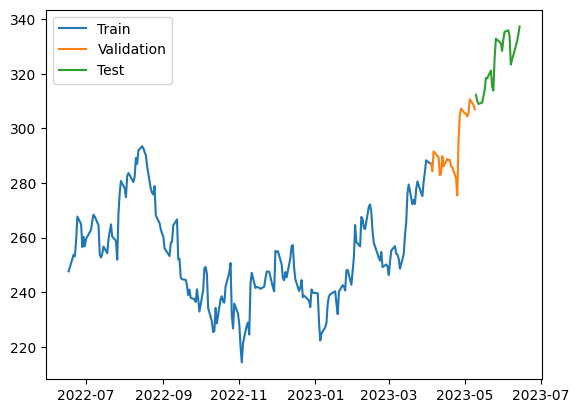

In [25]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [30]:
from tensorflow.keras import Sequential

In [28]:
from tensorflow.keras.optimizers import Adam

In [32]:
model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate= 0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 106ms/step - loss: 64684.2852 - mean_absolute_error: 253.7494 - val_loss: 86448.3516 - val_mean_absolute_error: 293.8405
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 64524.3477 - mean_absolute_error: 253.4333 - val_loss: 86271.8516 - val_mean_absolute_error: 293.5401
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 64380.2344 - mean_absolute_error: 253.1491 - val_loss: 86124.6406 - val_mean_absolute_error: 293.2892
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 64252.9062 - mean_absolute_error: 252.8976 - val_loss: 85962.0391 - val_mean_absolute_error: 293.0118
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 64064.1758 - mean_absolute_error: 252.5231 - val_loss: 85647.1172 - val_mean_absolute_error: 292.4739
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 63746.0898 - mean_absolute_error: 251.8933 - val_loss: 85

7/7 [==============================] - 0s 3ms/step


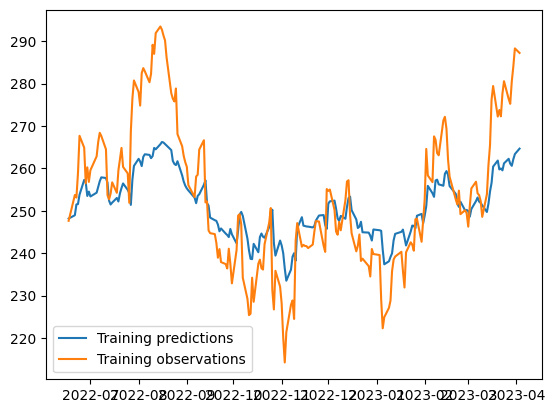

In [34]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training predictions', 'Training observations'])


1/1 [==============================] - 0s 101ms/step


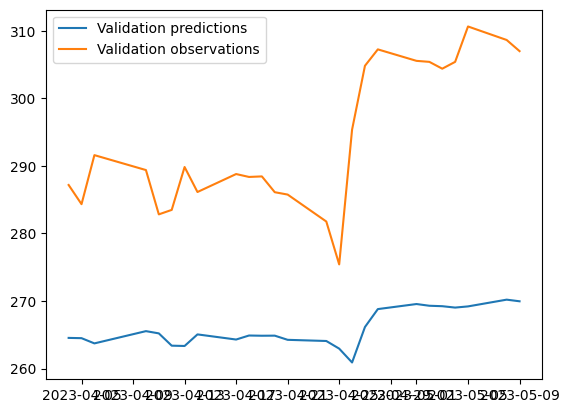

In [35]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation predictions', 'Validation observations'])


1/1 [==============================] - 0s 25ms/step


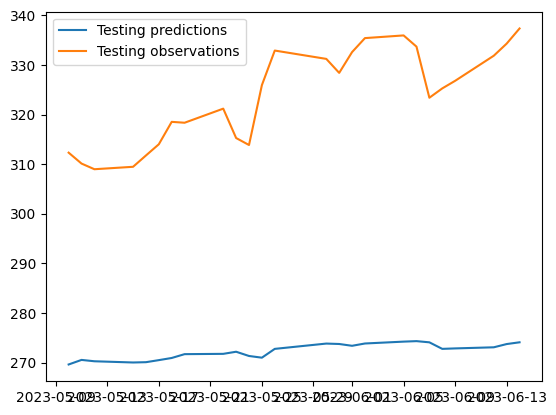

In [36]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing predictions', 'Testing observations'])


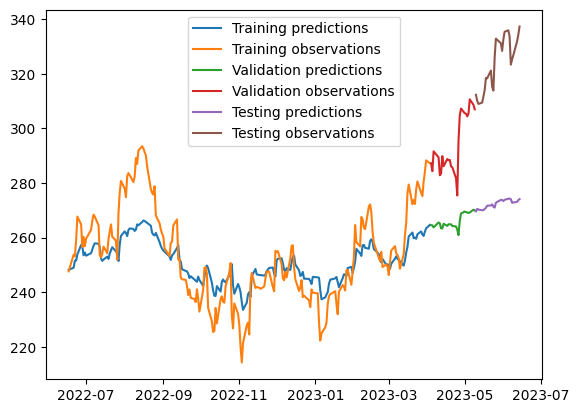

In [37]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training predictions',
            'Training observations',
            'Validation predictions',
            'Validation observations',
            'Testing predictions',
            'Testing observations'])

In [39]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 34ms/step


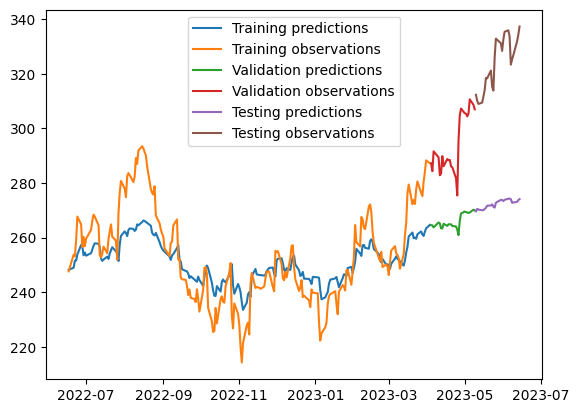

In [40]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training predictions',
            'Training observations',
            'Validation predictions',
            'Validation observations',
            'Testing predictions',
            'Testing observations'])